## Central Florida - USA Theme Parks Analysis

**Background:** Last year, more than $5.8 billion in local and state tax revenue was generated through the tourism industry, which is used by governments to fund operations such as infrastructure projects, public safety, school construction and more. The study shows economic impact from the tourism industry results in more than `$73` billion in business sales impact for 17 different sectors of the Orlando economy.

**Problem** This analysis will focus on identifying and classifying venues around Orlando, Florida Theme Parks to determine location for novel potential business opportunities that can fill gaps in current marketplace. As an optional task, we'll try to as overlay COVID-19 cases Heatmap to visualize potential effect on Orange’s County economy.



### Import libraries

In [1]:
# library to handle vectorized data
import numpy as np

# library for data analysis
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#library to handle JSON files
import json

#!pip install geopy

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

# library to handle requests
import urllib.request

# library to handle requests
import requests

# library to for pulling and parsing data out of HTML and XML files
import bs4 as bs

# transform JSON into a pandas dataframe
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import seaborn
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
#!pip install folium
import folium
from folium.plugins import FastMarkerCluster

print ("Libraries imported")

Libraries imported


###  Load OpenStreetMap Tourist Attractions for North America


**OpenStreetMap Tourist Attractions for North America** from ESRI ArcGIS.com. Feature layer provides access to OpenStreetMap tourist attraction point data for North America whic is updated **every 5 minutes** In OSM tourism features are places and things of interest to tourists, including places to see, stay and support to tourist. Credits to Steven Moore, Product Engineer at ESRI. Point data was cleaned and manipulated within ArcGIS software to produce a .csv file with attractions for the state of Florida, classified as follows:

* Theme Parks 
* Attractions
* Resorts 

Zip Code and City columns were added and exported to JSON file format.


### Load Attractions data from Florida_Attractions.json


In [2]:
# Load Attractions data from Florida_Attractions.json
with open ('./data/Florida_Attractions.json') as json_data:
    OSM_data = json.load(json_data)

In [3]:
OSM_data[0]

{'FID': 0,
 'objectid': 9203757,
 'osm_id2': 4980785875,
 'addr_house': '',
 'addr_stree': '',
 'addr_city': 'NONE',
 'addr_state': 'Florida',
 'addr_postc': 41,
 'name': 'Macks Fish Camp',
 'Type': 'attraction',
 'Latitude': 25.9624004,
 'Longitude': -80.4557037,
 'ZIP': 41,
 'Places': 'Area is in the South Florida Water Conservation Area 3A',
 'ZIP_Code': 41,
 'County': 'Broward'}

###  Convert json data into a *pandas* dataframe

In [4]:
# Convert json data into a pandas dataframe
# Define column names
column_names = ['Name', 'Type','City', 'ZipCode', 'County', 'Latitude', 'Longitude']

# instantiate the dataframe
OSM_df = pd.DataFrame(columns = column_names)

In [5]:
# load json file into dataframe

for data in OSM_data:
    name_ = data['name']
    typ_  = data['Type']
    city_ = data['addr_city']
    zip_  = data['addr_postc']
    cnty_ = data['County']
    lat_  = data['Latitude']
    lng_  = data['Longitude']
    
    OSM_df = OSM_df.append({'Name': name_,
                    'City': city_,
                    'Type': typ_,
                    'ZipCode': zip_,
                    'County': cnty_,
                    'Latitude': lat_,
                    'Longitude':lng_}, ignore_index = True)
    

###  Florida Attractions by Open Street Maps (OSM)

In [6]:
OSM_df.head()

,Name,Type,City,ZipCode,County,Latitude,Longitude
0,Macks Fish Camp,attraction,NONE,41,Broward,25.962400,-80.455704
1,"Miamitours.com Everglades Park, Alligator Air...",attraction,NONE,41,Broward,26.176701,-80.447700
2,Airboat Kiosk,attraction,NONE,41,Broward,26.176901,-80.447700
3,Animal Exhibits,attraction,NONE,41,Broward,26.177000,-80.447403
4,Alligator Show Seating,attraction,NONE,41,Broward,26.177200,-80.446999


In [7]:
print(" \nTotal Open Street Map (OSM) Attractions: {}".format(OSM_df.shape[0]))

 
Total Open Street Map (OSM) Attractions: 568


In [18]:
# Use geopy library to instantiate geocoder. Define an agent

address = 'Florida, USA'
geolocator = Nominatim(user_agent='orlando_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(' The geographical coordinate of {}, Florida are {}, {}.'.format(address, latitude, longitude))

 The geographical coordinate of Florida, USA, Florida are 27.7567667, -81.4639835.


In [21]:
# create map of  Open Street Map FLorida Attractions 
from folium.plugins import MarkerCluster
#fla_folium_map = folium.Map(width=860, height=860, location=[latitude, longitude],

fla_folium_map = folium.Map(location=[latitude, longitude],
                                      zoom_start=6,
                                      tiles='OpenStreetMap')

# add map title
title_html = '''
             <h3 align="center" style="font-size:20px"><b> Florida's Open Street Tourist Attractions Map</b></h3>
             '''
fla_folium_map.get_root().html.add_child(folium.Element(title_html))

# define MarkerCluster object
mc = MarkerCluster()

#creating a Marker for each point in DataFrame
# Each point will get a popup with their attraction's name

for row in OSM_df.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude,  row.Longitude],
                 popup=row.Name))
 
fla_folium_map.add_child(mc)

fla_folium_map


### Summarize / Graph Florida Attactions by County

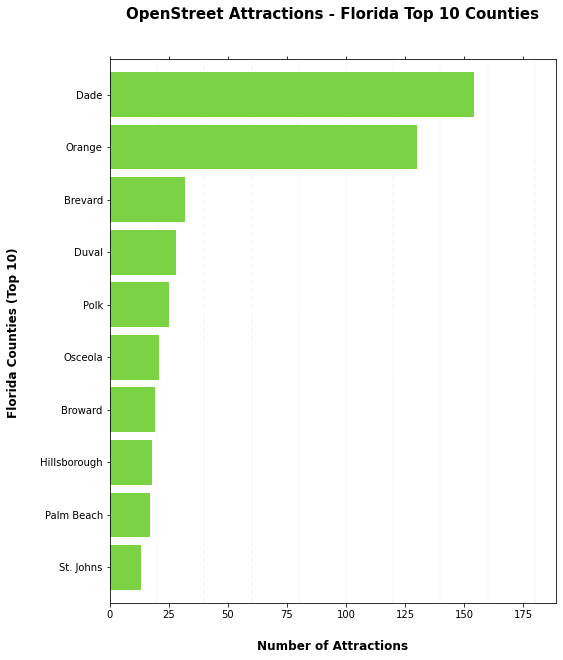

In [22]:
att_bycounty = OSM_df.groupby("County")['County'].count().sort_values().tail(10)  

from matplotlib.ticker import StrMethodFormatter

ax = att_bycounty.plot(kind = 'barh', figsize=(8,10), color = '#7bd344', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
    
# Switch off ticks
ax.tick_params(axis="both", which="both", bottom= True, top=True, labelbottom= True, left = True, right= False, labelleft=True)

# Draw vertical axis lines           
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set Title label
ax.set_title("OpenStreet Attractions - Florida Top 10 Counties", pad=40, weight='bold', size=15)
    
# Set x-axis label
ax.set_xlabel("Number of Attractions", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Florida Counties (Top 10) ", labelpad=20, weight='bold', size=12)
    
# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#### Florida Top 10 Counties OSM Tourist Attractions 

In [23]:
OSM_df.groupby("County")['County'].count().sort_values(axis=0, ascending=False).head(10)

County
Dade            154
Orange          130
Brevard          32
Duval            28
Polk             25
Osceola          21
Broward          19
Hillsborough     18
Palm Beach       17
St. Johns        13
Name: County, dtype: int64

###  Select  Florida Theme Parks within Orange County

In [24]:
#Select theme parks only.
POI = OSM_df[(OSM_df["County"] == 'Orange') & (OSM_df["Type"] == 'theme_park')].reset_index(drop=True)
POI

,Name,Type,City,ZipCode,County,Latitude,Longitude
0,The Crayola Experience,theme_park,Orlando,32809,Orange,28.444700,-81.391800
1,Universal Studios,theme_park,Orlando,32819,Orange,28.478001,-81.468697
2,Islands of Adventure,theme_park,Orlando,32819,Orange,28.471701,-81.471298
3,Universal Volcano Bay,theme_park,Orlando,32819,Orange,28.461700,-81.473000
4,Sea World,theme_park,Orlando,32821,Orange,28.410101,-81.461998
5,Discovey Cove,theme_park,Orlando,32821,Orange,28.405100,-81.462799
6,Aquatica Water Park,theme_park,Orlando,32821,Orange,28.415501,-81.456802
7,Epcot Center,theme_park,Orlando,32830,Orange,28.370100,-81.549599
8,Typhoon Lagoon,theme_park,Orlando,32830,Orange,28.365299,-81.528801
9,Magic Kingdom,theme_park,Orlando,32830,Orange,28.418699,-81.581200


#### Orange County, Florida Theme Parks

In [25]:
print(" \nTotal Open Street Map (OSM) Theme Parks: {}".format(POI.shape[0]))

 
Total Open Street Map (OSM) Theme Parks: 14


In [26]:
# Use geopy library to get the latitude and longitude values of Lakeland, Florida
address_oc = 'Orlando, Florida'
geolocator_oc = Nominatim(user_agent='theme_park_explorer')
location_oc = geolocator.geocode(address)
latitude_oc = location.latitude
longitude_oc = location.longitude
print(' The geographical coordinate of {}, Florida are {}, {}.'.format(address_oc, latitude_oc, longitude_oc))

 The geographical coordinate of Orlando, Florida, Florida are 27.7567667, -81.4639835.


#### Create a Theme Parks Map from OpenSteetMap (OSM) retrieved.

In [29]:
# create Theme Parks Map from Open Street Map FLorida Attractions 
from folium.plugins import MarkerCluster

fla_theme_parks_map = folium.Map(location=[latitude, longitude],
                                  zoom_start=6,
                                  tiles='OpenStreetMap')

# add map title
title_html = '''
             <h3 align="center" style="font-size:20px"><b> Orange County, Florida's Open Street Theme Parks Map</b></h3>
             '''
fla_theme_parks_map.get_root().html.add_child(folium.Element(title_html))

# define MarkerCluster object
tp_mc = MarkerCluster()

#creating a Marker for each point in DataFrame
# Each point will get a popup with their attraction's name

for row in POI.itertuples():
    tp_mc.add_child(folium.Marker(location=[row.Latitude,  row.Longitude],
                 popup=row.Name))
 
    fla_theme_parks_map.add_child(tp_mc)

fla_theme_parks_map

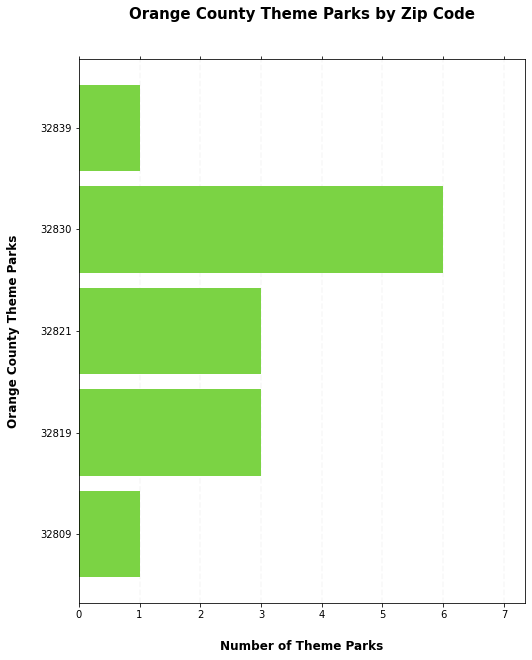

In [30]:
parksbyZipCode = POI.groupby("ZipCode")['ZipCode'].count().tail(10)  


from matplotlib.ticker import StrMethodFormatter

ax = parksbyZipCode.plot(kind = 'barh', figsize=(8,10), color = '#7bd344', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
    
# Switch off ticks
ax.tick_params(axis="both", which="both", bottom= True, top=True, labelbottom= True, left = True, right= False, labelleft=True)

# Draw vertical axis lines           
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set Title label
ax.set_title("Orange County Theme Parks by Zip Code", pad=40, weight='bold', size=15)
    
# Set x-axis label
ax.set_xlabel("Number of Theme Parks", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Orange County Theme Parks", labelpad=20, weight='bold', size=12)
    
# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#### Orange County, FL Theme Parks by Zip Code

In [31]:
parksbyZipCode.sort_values(ascending=False)

ZipCode
32830    6
32821    3
32819    3
32839    1
32809    1
Name: ZipCode, dtype: int64

In [32]:
print(" \nTotal Open Street Map (OSM) Orange County Theme Parks: {}".format(POI.shape))

 
Total Open Street Map (OSM) Orange County Theme Parks: (14, 7)


### Foursquare API

We begin by fetching a venues in Orlando using the Foursquare API. The Foursquare API has the `explore` API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

#### Define Foursquare Credentials and Version

In [33]:
# define your Foursquare ID, SECRET and VERSION
CLIENT_ID = 'IA04ODHJAUNI4VP0OF4JEDIPJE5UXWKXZUQPA4XIYQBDCPEH' 

# your Foursquare Secret
CLIENT_SECRET = 'Q4PR3D5DMMQURUOEYNBDALY0A4PLBWV42E0UFPZJR44MSZYP' 
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IA04ODHJAUNI4VP0OF4JEDIPJE5UXWKXZUQPA4XIYQBDCPEH
CLIENT_SECRET:Q4PR3D5DMMQURUOEYNBDALY0A4PLBWV42E0UFPZJR44MSZYP


#### Explore top 100 venues within 500 meters radius

In [34]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [35]:
radius = 500
LIMIT = 100

venues = []

for lat, long, name, zipcode in zip(POI['Latitude'], POI['Longitude'], POI['Name'], POI['ZipCode'] ):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius,
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            name,
            venue['venue']['name'],            
            zipcode,
            venue['venue']['location']['lat'],
            venue['venue']['location']['lng'],
            venue['venue']['categories'][0]['name']))
        

In [36]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)
venues_df.columns = ['ThemePark','VenueName','ZipCode','VenueLatitude','VenueLongitude','VenueCategory']   
print (venues_df.shape)
venues_df.head()

(842, 6)


,ThemePark,VenueName,ZipCode,VenueLatitude,VenueLongitude,VenueCategory
0,The Crayola Experience,M&M's World,32809,28.444712,-81.393757,Candy Store
1,The Crayola Experience,Bath & Body Works,32809,28.446133,-81.393423,Cosmetics Shop
2,The Crayola Experience,Crayola Experience,32809,28.444734,-81.392303,Arts & Crafts Store
3,The Crayola Experience,Charming Charlie,32809,28.444500,-81.393624,Accessories Store
4,The Crayola Experience,Vans,32809,28.444602,-81.393325,Shoe Store


In [37]:
# Find out how many categories can be curated from all the returned venues
print('{} venues were returned by Foursquare. '.format(venues_df.shape[0]))

842 venues were returned by Foursquare. 


In [38]:
venues_df['VenueCategory'].unique()[:50]

array(['Candy Store', 'Cosmetics Shop', 'Arts & Crafts Store',
       'Accessories Store', 'Shoe Store', 'Toy / Game Store',
       'Sporting Goods Shop', 'Department Store', 'Clothing Store',
       'Chocolate Shop', 'Snack Place', 'Electronics Store',
       'Italian Restaurant', 'Lingerie Store', 'Burger Joint', 'Café',
       'Shopping Mall', "Men's Store", 'Coffee Shop', 'Bakery', 'Spa',
       'Sandwich Place', 'Ice Cream Shop', 'Brazilian Restaurant',
       'American Restaurant', 'Food Court', 'Fast Food Restaurant',
       'Pizza Place', 'Supplement Shop', 'Kids Store', 'Gift Shop',
       'Boutique', 'Argentinian Restaurant', 'Fried Chicken Joint',
       'Hotel', 'Jewelry Store', 'Bistro', 'Asian Restaurant',
       'Juice Bar', "Women's Store", 'Theme Park',
       'Theme Park Ride / Attraction', 'Music Venue', 'Brewery', 'Bar',
       'Souvenir Shop', 'English Restaurant', 'Food Stand', 'Parade',
       'Beer Garden'], dtype=object)

In [42]:
# create map of  Foursquare Venues Retieved 
from folium.plugins import MarkerCluster

fsq_venue_map = folium.Map(location=[latitude_oc, longitude_oc],
                                  zoom_start=6,
                                  tiles='OpenStreetMap')

# add map title
title_html = '''
             <h3 align="center" style="font-size:20px"><b> Foursquare Venues Retrieved around Theme Parks</b></h3>
             '''
fsq_venue_map.get_root().html.add_child(folium.Element(title_html))

# define MarkerCluster object
fsq_mc = MarkerCluster()

#creating a Marker for each point in DataFrame
# Each point will get a popup with their attraction's name

for row in venues_df.itertuples():
    pop_text = row.VenueName.replace("'", "")
    fsq_mc.add_child(folium.Marker(location=[row.VenueLatitude, row.VenueLongitude],popup=pop_text))
    fsq_venue_map.add_child(fsq_mc)

fsq_venue_map

In [43]:
venues_df.groupby(["ThemePark", "ZipCode"]).count()

,,VenueName,VenueLatitude,VenueLongitude,VenueCategory
ThemePark,ZipCode,,,,
Animal Kingdom,32830,56,56,56,56
Aquatica Water Park,32821,24,24,24,24
Blizzard Beach,32830,20,20,20,20
Discovey Cove,32821,30,30,30,30
Epcot Center,32830,100,100,100,100
Hollywood Studios,32830,94,94,94,94
Islands of Adventure,32819,100,100,100,100
Magic Kingdom,32830,100,100,100,100
Sea World,32821,63,63,63,63


## Analyze each Theme Park

In [44]:
# One hot encoding

poi_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix = "", prefix_sep = "")

# add postal, borough and neighborhood columns back to dataframe
poi_onehot['ThemePark']    = venues_df['ThemePark']
poi_onehot['ZipCode']      = venues_df['ZipCode']

# move Theme Park Name to the first columns
fixed_columns = list(poi_onehot.columns[-2:]) + list(poi_onehot.columns[:-2])
poi_onehot = poi_onehot[fixed_columns]

poi_onehot.shape

(842, 148)

In [45]:
poi_grouped = poi_onehot.groupby(["ThemePark","ZipCode"]).mean().reset_index()
poi_grouped.head()

,ThemePark,ZipCode,Accessories Store,Advertising Agency,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bakery,Bar,Beach,Beach Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Deli / Bodega,Department Store,Diner,Discount Store,Doctor's Office,Donut Shop,Electronics Store,English Restaurant,Exhibit,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Gym / Fitness Center,High School,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lighthouse,Lingerie Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mini Golf,Miscellaneous Shop,Museum,Music Store,Music Venue,Optical Shop,Parade,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Public Bathroom,Resort,Restaurant,River,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Souvenir Shop,Spa,Sporting Goods Shop,Stadium,Steakhouse,Supplement Shop,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Water Park,Wine Bar,Wine Shop,Women's Store,Zoo
0,Animal Kingdom,32830,0.00,0.0,0.053571,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.017857,0.017857,0.00,0.017857,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.017857,0.0,0.00,0.00,0.0,0.0,0.053571,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.00,0.089286,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.017857,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.017857,0.000000,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.017857,0.0,0.017857,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.017857,0.017857,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.035714,0.035714,0.482143,0.017857,0.0,0.0,0.017857,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.000000
1,Aquatica Water Park,32821,0.00,0.0,0.000000,0.083333,0.0,0.125000,0.000000,0.0,0.00,0.0,0.000000,0.041667,0.00,0.000000,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.00,0.166667,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.00,0.00,0.0,0.041667
2,Blizzard Beach,32830,0.00,0.0,0.000000,0.100000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.10,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.00,0.100000,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0

In [46]:
poi_grouped.shape

(14, 148)

In [47]:
# Create a new dataframe and display the top 10 venues for each Theme Park

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

areaColumns = ['ThemePark','ZipCode']
freqColumns = []

for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns


# create a new dataframe
venues_sorted = pd.DataFrame(columns = columns)
venues_sorted['ThemePark'] = poi_grouped['ThemePark']
venues_sorted['ZipCode']   = poi_grouped['ZipCode']
#venues_sorted['City']     = poi_grouped['City']



for ind in np.arange(poi_grouped.shape[0]):
    row_categories = poi_grouped.iloc[ind, :].iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    venues_sorted.iloc[ind, 2:] = row_categories_sorted.index.values[0:num_top_venues]

# venues_venues_sorted.sort_values(freqColumns, inplace = True)    
venues_sorted.sort_values(freqColumns, inplace = True)


In [48]:
#venues_sorted.set_index('ThemePark', inplace=True)
venues_sorted.head()

,ThemePark,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,The Crayola Experience,32809,Clothing Store,Accessories Store,Shoe Store,Cosmetics Shop,Toy / Game Store,Department Store,Kids Store,Sandwich Place,Ice Cream Shop,Lingerie Store
10,The Holy Land Experience,32839,Furniture / Home Store,Cosmetics Shop,Department Store,Gym / Fitness Center,Intersection,Pharmacy,Pet Store,Optical Shop,Music Store,Museum
13,Universal Volcano Bay,32819,Hotel,Hotel Pool,Theme Park Ride / Attraction,Water Park,Resort,Coffee Shop,Ice Cream Shop,Gift Shop,Cafeteria,Brazilian Restaurant
8,Sea World,32821,Theme Park Ride / Attraction,Aquarium,Gift Shop,Exhibit,Theme Park,American Restaurant,Stadium,Theater,Zoo,BBQ Joint
12,Universal Studios,32819,Theme Park Ride / Attraction,Bar,Gift Shop,Ice Cream Shop,American Restaurant,Theme Park,Theme Restaurant,Music Venue,Public Art,Souvenir Shop


In [49]:
venues_sorted.shape

(14, 12)

## 4. Cluster Theme Parks

Run k-means to cluster Theme Parks into 5 clusters

In [50]:
# set number of clusters
kclusters = 5
grouped_clustering = poi_grouped.drop(["ThemePark"],1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 1, 4, 1, 1, 0, 1, 4, 2])

In [51]:
# create a new DataFrame that includes the cluster as well as the top venues for each neighborhood,
df_merged = POI.copy()

# add clusteting labels
df_merged["Cluster Labels"] = kmeans.labels_

In [52]:
# merge grouped with themepark data  to add latitude/longitude for each neighborhood
df_merged = df_merged.join(venues_sorted.drop(["ZipCode"],1).set_index("ThemePark"), on="Name")

In [68]:
# sort result by Cluster Labels
df_merged.sort_values(["Cluster Labels"], inplace = True)
df_merged

,Name,Type,City,ZipCode,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Aquatica Water Park,theme_park,Orlando,32821,Orange,28.415501,-81.456802,0,Water Park,Gift Shop,Aquarium,Theme Park Ride / Attraction,Exhibit,American Restaurant,BBQ Joint,Zoo,Arcade,English Restaurant
12,Hollywood Studios,theme_park,Orlando,32830,Orange,28.358200,-81.558998,0,Theme Park Ride / Attraction,Gift Shop,Snack Place,American Restaurant,Souvenir Shop,Theme Restaurant,Clothing Store,Ice Cream Shop,Theme Park,Lounge
13,The Holy Land Experience,theme_park,Orlando,32839,Orange,28.495899,-81.433197,0,Furniture / Home Store,Cosmetics Shop,Department Store,Gym / Fitness Center,Intersection,Pharmacy,Pet Store,Optical Shop,Music Store,Museum
0,The Crayola Experience,theme_park,Orlando,32809,Orange,28.444700,-81.391800,1,Clothing Store,Accessories Store,Shoe Store,Cosmetics Shop,Toy / Game Store,Department Store,Kids Store,Sandwich Place,Ice Cream Shop,Lingerie Store
2,Islands of Adventure,theme_park,Orlando,32819,Orange,28.471701,-81.471298,1,Theme Park Ride / Attraction,Gift Shop,Theme Park,American Restaurant,Performing Arts Venue,Candy Store,Bar,Playground,Trail,Greek Restaurant
4,Sea World,theme_park,Orlando,32821,Orange,28.410101,-81.461998,1,Theme Park Ride / Attraction,Aquarium,Gift Shop,Exhibit,Theme Park,American Restaurant,Stadium,Theater,Zoo,BBQ Joint
5,Discovey Cove,theme_park,Orlando,32821,Orange,28.405100,-81.462799,1,Theme Park Ride / Attraction,Water Park,Theme Park,Exhibit,Stadium,Café,General Entertainment,Building,Diner,Market
7,Epcot Center,theme_park,Orlando,32830,Orange,28.370100,-81.549599,1,Theme Park Ride / Attraction,Gift Shop,Food Stand,Souvenir Shop,Wine Shop,Mexican Restaurant,Cocktail Bar,Snack Place,Ice Cream Shop,Italian Restaurant
11,Animal Kingdom,theme_park,Orlando,32830,Orange,28.358999,-81.590698,1,Theme Park Ride / Attraction,Gift Shop,African Restaurant,Cocktail Bar,Theater,Coffee Shop,Theme Park,Asian Restaurant,Lounge,Snack Place
9,Magic Kingdom,theme_park,Orlando,32830,Orange,28.418699,-81.581200,2,Theme Park Ride / Attraction,Gift Shop,Snack Place,Ice Cream Shop,American Restaurant,Train Station,Theme Park,Public Bathroom,Tourist Information Center,Candy Store


In [57]:
# Use geopy library to get the latitude and longitude values of Lakeland, Florida
address_oc = 'Orange County, Florida'
geolocator_c = Nominatim(user_agent='clusters')
location_c = geolocator.geocode(address)
latitude_c = location.latitude
longitude_c = location.longitude
print(' The geographical coordinate of {}, Florida are {}, {}.'.format(address_oc, latitude_oc, longitude_oc))

 The geographical coordinate of Orange County, Florida, Florida are 27.7567667, -81.4639835.


In [71]:
# Visualize resulting clusters

map_clusters = folium.Map(location=[latitude_c, longitude_c], zoom_start = 10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0 ,1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add map title
title_html = '''
             <h3 align="center" style="font-size:20px"><b> Visualize Resulting Foursquare Clusters</b></h3>
             '''
map_clusters.get_root().html.add_child(folium.Element(title_html))

# add markers
markers_colors = []
for lat, lon, zipcode , county, cluster in zip(df_merged['Latitude'],
                                                           df_merged['Longitude'],
                                                           df_merged['ZipCode'],
                                                           df_merged['County'],
                                                           df_merged['Cluster Labels']):
    
    label = folium.Popup('Zip Code:{} ({}) - Cluster {}'.format(zipcode, county,cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 10,
        popup = label,
        color = rainbow[cluster -1],
        fill = True,
        fill_color = rainbow[cluster -1],
        fill_opacity = 0.7).add_to(map_clusters)

map_clusters

### Examine Clusters

####  Clusters 1

In [75]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Aquatica Water Park,28.415501,-81.456802,0,Water Park,Gift Shop,Aquarium,Theme Park Ride / Attraction,Exhibit,American Restaurant,BBQ Joint,Zoo,Arcade,English Restaurant
12,Hollywood Studios,28.358200,-81.558998,0,Theme Park Ride / Attraction,Gift Shop,Snack Place,American Restaurant,Souvenir Shop,Theme Restaurant,Clothing Store,Ice Cream Shop,Theme Park,Lounge
13,The Holy Land Experience,28.495899,-81.433197,0,Furniture / Home Store,Cosmetics Shop,Department Store,Gym / Fitness Center,Intersection,Pharmacy,Pet Store,Optical Shop,Music Store,Museum


####  Clusters 2

In [76]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Crayola Experience,28.444700,-81.391800,1,Clothing Store,Accessories Store,Shoe Store,Cosmetics Shop,Toy / Game Store,Department Store,Kids Store,Sandwich Place,Ice Cream Shop,Lingerie Store
2,Islands of Adventure,28.471701,-81.471298,1,Theme Park Ride / Attraction,Gift Shop,Theme Park,American Restaurant,Performing Arts Venue,Candy Store,Bar,Playground,Trail,Greek Restaurant
4,Sea World,28.410101,-81.461998,1,Theme Park Ride / Attraction,Aquarium,Gift Shop,Exhibit,Theme Park,American Restaurant,Stadium,Theater,Zoo,BBQ Joint
5,Discovey Cove,28.405100,-81.462799,1,Theme Park Ride / Attraction,Water Park,Theme Park,Exhibit,Stadium,Café,General Entertainment,Building,Diner,Market
7,Epcot Center,28.370100,-81.549599,1,Theme Park Ride / Attraction,Gift Shop,Food Stand,Souvenir Shop,Wine Shop,Mexican Restaurant,Cocktail Bar,Snack Place,Ice Cream Shop,Italian Restaurant
11,Animal Kingdom,28.358999,-81.590698,1,Theme Park Ride / Attraction,Gift Shop,African Restaurant,Cocktail Bar,Theater,Coffee Shop,Theme Park,Asian Restaurant,Lounge,Snack Place


####  Clusters 3

In [77]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Magic Kingdom,28.418699,-81.5812,2,Theme Park Ride / Attraction,Gift Shop,Snack Place,Ice Cream Shop,American Restaurant,Train Station,Theme Park,Public Bathroom,Tourist Information Center,Candy Store


####  Clusters 4

In [78]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Blizzard Beach,28.3524,-81.574799,3,Theme Park Ride / Attraction,Gift Shop,Pool,American Restaurant,Bar,Water Park,Spa,Trail,Hot Dog Joint,Scenic Lookout


####  Clusters 5

In [79]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Universal Studios,28.478001,-81.468697,4,Theme Park Ride / Attraction,Bar,Gift Shop,Ice Cream Shop,American Restaurant,Theme Park,Theme Restaurant,Music Venue,Public Art,Souvenir Shop
3,Universal Volcano Bay,28.461700,-81.473000,4,Hotel,Hotel Pool,Theme Park Ride / Attraction,Water Park,Resort,Coffee Shop,Ice Cream Shop,Gift Shop,Cafeteria,Brazilian Restaurant
8,Typhoon Lagoon,28.365299,-81.528801,4,Theme Park Ride / Attraction,Water Park,American Restaurant,Restaurant,Bar,Fast Food Restaurant,Coffee Shop,Ice Cream Shop,River,Souvenir Shop


## Summary Analysis

**Cluster 2** Groups most of the theme parks in Orange County Florida. There is an overabundance of gift shops, restaurants and clothes and shoes stores. There may be an opportunity to start small coffee, snacks and ice cream shops which -according to the Foursquare data retrieved and analyzed - have a less prominent place among the top 10 most common venues categories. In order to validate these conclusions, a more detailed study will be required since some of the suggested categories are not stored independently but as part of theme parks venue category. 
